In [1]:
# coding: UTF-8
%matplotlib inline
# Pandas/Numpy/Scikit-learn
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

### K-Means 中心からクラスタ中心への距離を計算するメソッド

In [2]:
def distance_to_centroid(columns, row, centroid):
    """
    K-Means 中心からクラスタ中心への距離を計算するメソッド
    https://stackoverflow.com/questions/29036561/how-to-get-meaningful-results-of-kmeans-in-scikit-learn
    """
    row = row[columns]
    return euclidean(row, centroid)


### 実行パラメータ

In [3]:
params = {
    "cluster" : 2,   # 分割クラスタ数
    "outlier" : 3,   # 外れ値とする割合(クラスタ中心からの距離上位N%)
    "column1" : "inquirer_cd_710100000001700", # 変数1とする列
    "column2" : "biz_cd_JM01000000006000"      # 変数2とする列
}


#### データ読み込み・不要な列の削除

In [4]:
# データ読み込み&不要列(Date)削除
src = pd.read_csv("./data.csv")

predict_column = [params["column1"], params["column2"]]

# 不要列削除
df = src.copy()
df = df.loc[:, predict_column]

df


,inquirer_cd_710100000001700,biz_cd_JM01000000006000
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


#### K-Mean実行

In [5]:
# K-Mean 
nd = df.values
kmean = KMeans(n_clusters = params["cluster"])
Y = kmean.fit_predict(nd)

Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 予測結果を集計し、結果をまとめる

In [ ]:
df = src.copy()

# 分類結果を Cluster 列に追加
Ycol = pd.Series(Y)
Ycol = Ycol.rename("Cluster")
df = pd.concat([df, Ycol], axis=1)

# 各クラスタ中心との距離を DistanceToCentroid 列に追加
df['DistanceToCentroid'] = df.apply(lambda r: distance_to_centroid(
    predict_column, r, kmean.cluster_centers_[r["Cluster"]]), axis=1)

# DistanceToCentroid 上位n% に含まれるかどうかを Outlier 列に追加
# DistanceToCentroidでソートして2つのDataFrameに分け、Outlierをセットして戻す
if params["outlier"] > 0:
    tdf = df.sort_values(by='DistanceToCentroid', ascending=False)
    outlier_cnt = int(len(tdf) * params["outlier"] / 100)
    
    # Outlier
    tdf1 = tdf[:][:outlier_cnt]
    tdf1['Outlier'] = tdf1.apply(lambda r: 1, axis = 1)
    
    # not Outlier
    tdf2 = tdf[:][outlier_cnt + 1:]
    tdf2['Outlier'] = tdf2.apply(lambda r: 0, axis = 1)
    
    df = pd.concat([tdf1, tdf2])

df

#### グラフ化

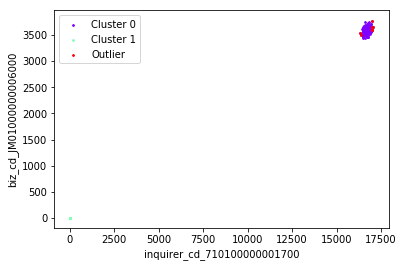

In [7]:
# カラーマップ初期化
cnum = params["cluster"]
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / cnum) for c in np.arange(1, (cnum + 1))]

# Clusterごとにグループ化し、散布図描画
fig, ax = plt.subplots(1, 1)
for i, (key, group) in enumerate(df.groupby(df['Cluster'])):
    group.plot(
        kind='scatter',
        x=params["column1"],
        y=params["column2"],
        s=3,
        color=cmap(i / cnum),
        ax=ax,
        label="Cluster %d" % (i))

# Outlier を赤で描画
outliers = df[df['Outlier'] == 1]
if len(outliers) > 0:
    outliers.plot(
        kind='scatter',
        x=params["column1"],
        y=params["column2"],
        s=3,
        color='Red',
        ax=ax,
        label="Outlier")
    
plt.show()
